<a href="https://colab.research.google.com/github/suinkangme/COMP432-GroupI/blob/main/Task2_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.tree
import sklearn.ensemble
import sklearn.metrics
from google.colab import files
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
!gdown 1L5mB-u4-rZIt-CRVLEXPr6Li6W0d21ww

Downloading...
From: https://drive.google.com/uc?id=1L5mB-u4-rZIt-CRVLEXPr6Li6W0d21ww
To: /content/Dataset2_imagenet.csv
100% 32.0M/32.0M [00:00<00:00, 122MB/s]


In [3]:
data = pd.read_csv('Dataset2_imagenet.csv')

In [4]:
test_size = 0.2

In [5]:
X = data.values[:,:-1]
y = data.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)


Without Gridsearch

In [6]:
rf1 = sklearn.ensemble.RandomForestClassifier().fit(X_train, y_train)

In [7]:
print('Dataset2_imagenet.csv without Gridsearch')
ya_pred = rf1.predict(X_train)
yb_pred = rf1.predict(X_test)
print("-----------------------------------------------------")

Dataset2_imagenet.csv without Gridsearch
-----------------------------------------------------


Training set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1617
         1.0       1.00      1.00      1.00      1581
         2.0       1.00      1.00      1.00      1602

    accuracy                           1.00      4800
   macro avg       1.00      1.00      1.00      4800
weighted avg       1.00      1.00      1.00      4800



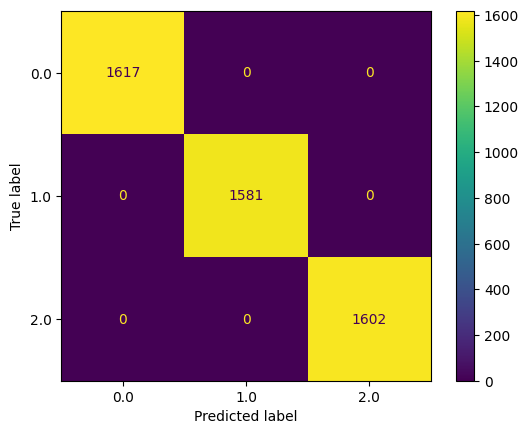

In [8]:
print("Training set:")
ConfusionMatrixDisplay(confusion_matrix(y_train, ya_pred), display_labels=rf1.classes_).plot()
print(classification_report(y_train, ya_pred))

Test set:
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93       383
         1.0       0.97      0.94      0.96       419
         2.0       0.98      0.97      0.98       398

    accuracy                           0.95      1200
   macro avg       0.96      0.96      0.95      1200
weighted avg       0.96      0.95      0.96      1200



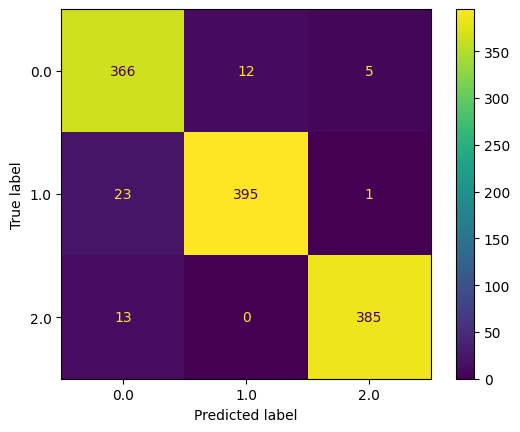

In [9]:
print("Test set:")
ConfusionMatrixDisplay(confusion_matrix(y_test, yb_pred), display_labels=rf1.classes_).plot()
print(classification_report(y_test, yb_pred))

With Gridsearch

In [10]:
rf2 = sklearn.ensemble.RandomForestClassifier()
param_grid1 = {'criterion': ['gini', 'entropy'],
               'max_depth': [3, 4, None],
               'min_samples_split': [2, 3, 4]}
grid1 = GridSearchCV(estimator=rf2, param_grid=param_grid1, scoring='accuracy')
grid1.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, None],
                         'min_samples_split': [2, 3, 4]},
             scoring='accuracy')

In [11]:
rf3 = sklearn.ensemble.RandomForestClassifier(criterion=grid1.best_params_['criterion'],
                                              max_depth=grid1.best_params_['max_depth'],
                                              min_samples_split=grid1.best_params_['min_samples_split'])
rf3.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=4)

In [12]:
print('Dataset2_imagenet.csv with Gridsearch')
ya_pred2 = rf3.predict(X_train)
yb_pred2 = rf3.predict(X_test)
print(grid1.best_params_)
print("-----------------------------------------------------")

Dataset2_imagenet.csv with Gridsearch
{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 4}
-----------------------------------------------------


Training set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1617
         1.0       1.00      1.00      1.00      1581
         2.0       1.00      1.00      1.00      1602

    accuracy                           1.00      4800
   macro avg       1.00      1.00      1.00      4800
weighted avg       1.00      1.00      1.00      4800



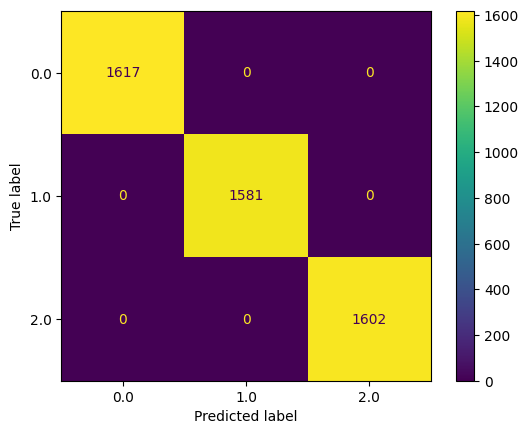

In [13]:
print("Training set:")
ConfusionMatrixDisplay(confusion_matrix(y_train, ya_pred2), display_labels=rf1.classes_).plot()
print(classification_report(y_train, ya_pred2))

Test set: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 4}
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.93       383
         1.0       0.97      0.94      0.96       419
         2.0       0.99      0.97      0.98       398

    accuracy                           0.96      1200
   macro avg       0.96      0.96      0.96      1200
weighted avg       0.96      0.96      0.96      1200



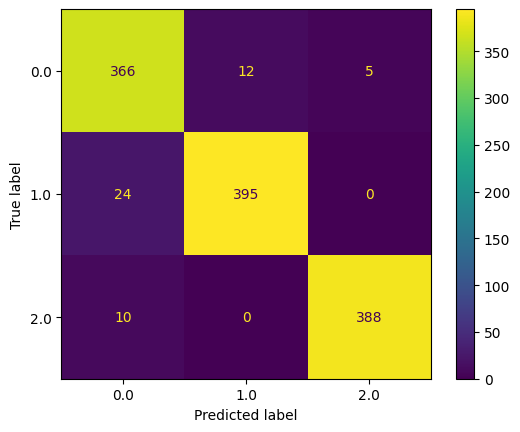

In [14]:
print(f"Test set: {grid1.best_params_}")
ConfusionMatrixDisplay(confusion_matrix(y_test, yb_pred2), display_labels=rf1.classes_).plot()
print(classification_report(y_test, yb_pred2))